In [1]:
import pandas as pd
from statsbombpy import sb
import numpy as np
from mplsoccer import Pitch,VerticalPitch, Sbopen, FontManager, inset_image
import plotly.express as px
import matplotlib.pyplot as plt

### Setting the dataframe

In [2]:
MATCH_ID = 3869685
match_event_df = sb.events(match_id=MATCH_ID)
match_360_df = pd.read_json(f'/Users/asheshlalshrestha/Desktop/Datanal/Project/Football Data/open-data-master/data/three-sixty/{MATCH_ID}.json')
df = pd.merge(left=match_event_df,right = match_360_df,
              left_on='id',right_on='event_uuid',how='left')

In [3]:
# df.to_csv("Generated Datsets/match.csv")

In [4]:
df.head()

50_50 bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
0   NaN                NaN                  NaN                     NaN   
1   NaN                NaN                  NaN                     NaN   
2   NaN                NaN                  NaN                     NaN   
3   NaN                NaN                  NaN                     NaN   
4   NaN                NaN                  NaN                     NaN   

  ball_recovery_recovery_failure block_deflection block_offensive  \
0                            NaN              NaN             NaN   
1                            NaN              NaN             NaN   
2                            NaN              NaN             NaN   
3                            NaN              NaN             NaN   
4                            NaN              NaN             NaN   

  carry_end_location clearance_aerial_won clearance_body_part  ...  \
0                NaN                  NaN                 NaN  ...   
1                NaN                  NaN                 NaN  ...   
2                NaN                  NaN                 NaN  ...   
3                NaN                  NaN                 NaN  ...   
4                NaN                  NaN                 NaN  ...   

  substitution_replacement_id  \
0                         NaN   
1                         NaN   
2                         NaN   
3                         NaN   
4                         NaN   

                                             tactics       team team_id  \
0  {'formation': 433, 'lineup': [{'player': {'id'...  Argentina     779   
1  {'formation': 4231, 'lineup': [{'player': {'id...     France     771   
2                                                NaN     France     771   
3                                                NaN  Argentina     779   
4                                                NaN     France     771   

      timestamp         type under_pressure event_uuid visible_area  \
0  00:00:00.000  Starting XI            NaN        NaN          NaN   
1  00:00:00.000  Starting XI            NaN        NaN          NaN   
2  00:00:00.000   Half Start            NaN        NaN          NaN   
3  00:00:00.000   Half Start            NaN        NaN          NaN   
4  00:00:00.000   Half Start            NaN        NaN          NaN   

  freeze_frame  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 97 columns]

### Lets dive deep into the match action types and statistics

In [5]:
## filtering the dataset for france only
df_france_stats = df[df['team']=='France']
## filtering the dataset above

## total passes under 45 mins
total_pass_under_45 = df_france_stats[(df_france_stats['type']=='Pass') & (df_france_stats['minute']<=45)].shape[0]

## total passes over 45 mmins
total_pass_over_45 = df_france_stats[(df['type']=='Pass') & (df['minute']>45)].shape[0]

## total failed passes under 45 mins
tota_failed_under_45 = df_france_stats[
    (df_france_stats['type'] == 'Pass') & 
    (df_france_stats['minute'] <= 45) & 
    (df_france_stats['pass_outcome'].isin(['Out', 'Incomplete']))
].shape[0]

## total failed passes over 45 mins
tota_failed_over_45 = df_france_stats[
    (df_france_stats['type'] == 'Pass') & 
    (df_france_stats['minute'] > 45) & 
    (df_france_stats['pass_outcome'].isin(['Out', 'Incomplete']))
].shape[0]

# Creating a dictionary
data = {'Category': ['Under 45 Mins', 'Over 45 Mins'],
        'Total': [total_pass_under_45, total_pass_over_45],
        'Failed': [tota_failed_under_45, tota_failed_over_45]}

# Create DataFrame
passes_data = pd.DataFrame(data)

# Melt the DataFrame to long format for Plotly Express
passes_data_long = passes_data.melt(id_vars='Category', var_name='Status', value_name='Count')

fig = px.bar(passes_data_long, x='Category', y='Count', color='Status', barmode='group',
             labels={'Category': 'Pass Categories', 'Count': 'Count'},
             title='Passes for France')
fig.show()

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [6]:
df_pass = df_france_stats[['type','location','pass_end_location',
                           'pass_outcome','pass_recipient','pass_type',
                           'play_pattern','player','under_pressure']]
df_pass = df_pass[df_pass['type'] == 'Pass']
pass_played = df_pass.groupby('player').size().reset_index(name='PassPlayed').sort_values(by='PassPlayed',ascending=False)
pass_recieved = df_pass.groupby('pass_recipient').size().reset_index(name='PassRecieved').sort_values(by='PassRecieved',ascending=False)
print("Total passes played by a player")
print(pass_played)
print('------------------------------------------------------------------------')
print("Total passes recieved by a player")
print(pass_recieved)

Total passes played by a player
                             player  PassPlayed
2         Aurélien Djani Tchouaméni          69
7                      Jules Koundé          67
3          Dayotchanculle Upamecano          64
14                   Raphaël Varane          61
0                     Adrien Rabiot          51
15  Theo Bernard François Hernández          49
5                       Hugo Lloris          41
1                 Antoine Griezmann          30
9              Kylian Mbappé Lottin          27
4                 Eduardo Camavinga          24
10                    Marcus Thuram          22
13                Randal Kolo Muani          15
8                    Kingsley Coman          15
12                  Ousmane Dembélé          13
16                  Youssouf Fofana          11
11                   Olivier Giroud           9
6                   Ibrahima Konaté           2
------------------------------------------------------------------------
Total passes recieved by a play

### Passes played by Aurélien Djani Tchouaméni
As Tchouaméni is the highest passer

In [7]:
ID=10481.0
## filtering the pass datapoints for Tchouaméni
Tchouaméni_pass = df[(df['player_id']==ID) & (df['type']=='Pass')].reset_index(drop=True)

## setting the x and y start and end points for the passes
Tchouaméni_pass[['x_start','y_start']] = pd.DataFrame(Tchouaméni_pass.location.tolist(),index=Tchouaméni_pass.index)
Tchouaméni_pass[['x_end','y_end']] = pd.DataFrame(Tchouaméni_pass.pass_end_location.tolist(),index=Tchouaméni_pass.index)
## calculating the distances
Tchouaméni_pass['distance'] = np.sqrt((Tchouaméni_pass['x_end'] - Tchouaméni_pass['x_start'])**2 + (Tchouaméni_pass['y_end'] - Tchouaméni_pass['y_start'])**2)
Tchouaméni_pass.head()

50_50 bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
0   NaN                NaN                  NaN                     NaN   
1   NaN                NaN                  NaN                     NaN   
2   NaN                NaN                  NaN                     NaN   
3   NaN                NaN                  NaN                     NaN   
4   NaN                NaN                  NaN                     NaN   

  ball_recovery_recovery_failure block_deflection block_offensive  \
0                            NaN              NaN             NaN   
1                            NaN              NaN             NaN   
2                            NaN              NaN             NaN   
3                            NaN              NaN             NaN   
4                            NaN              NaN             NaN   

  carry_end_location clearance_aerial_won clearance_body_part  ...  type  \
0                NaN                  NaN                 NaN  ...  Pass   
1                NaN                  NaN                 NaN  ...  Pass   
2                NaN                  NaN                 NaN  ...  Pass   
3                NaN                  NaN                 NaN  ...  Pass   
4                NaN                  NaN                 NaN  ...  Pass   

  under_pressure                            event_uuid  \
0            NaN  a5956ecc-d637-44d2-8705-e2079e12013e   
1            NaN                                   NaN   
2           True                                   NaN   
3           True  324a4fa4-12a8-4589-beeb-081d171ce841   
4            NaN  3e734ca7-6264-469e-8069-1a188f5bdc83   

                                        visible_area  \
0  [10.227276315524, 80.0, 41.5155332886657, 0.0,...   
1                                                NaN   
2                                                NaN   
3  [22.7413784491641, 80.0, 44.4048044348883, 0.0...   
4  [16.8111045662512, 80.0, 44.4499428657201, 0.0...   

                                        freeze_frame x_start y_start x_end  \
0  [{'teammate': True, 'actor': False, 'keeper': ...    49.7    43.6  96.0   
1                                                NaN    43.9    51.3  66.8   
2                                                NaN    63.8    13.0  61.0   
3  [{'teammate': True, 'actor': False, 'keeper': ...    50.9    26.0  46.0   
4  [{'teammate': True, 'actor': False, 'keeper': ...    44.5    47.7  40.0   

  y_end   distance  
0   1.8  62.377320  
1  60.1  24.532631  
2   5.1   8.381527  
3  49.4  23.907530  
4  62.4  15.373354  

[5 rows x 102 columns]

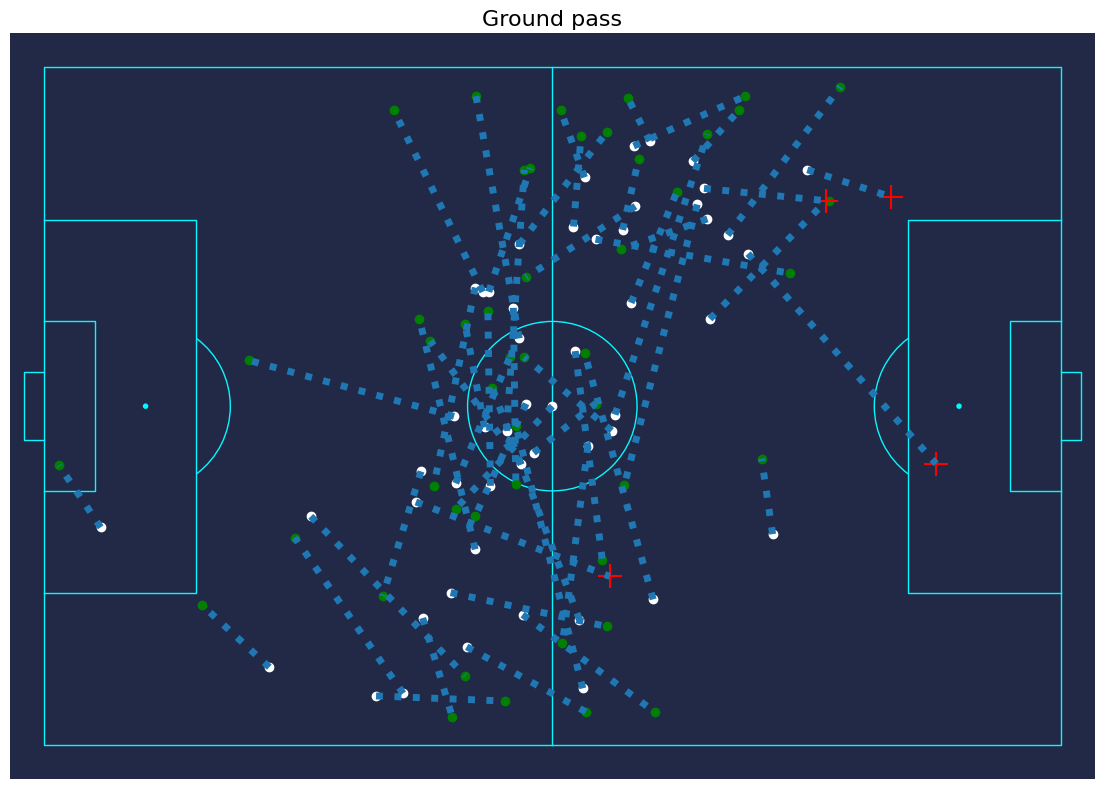

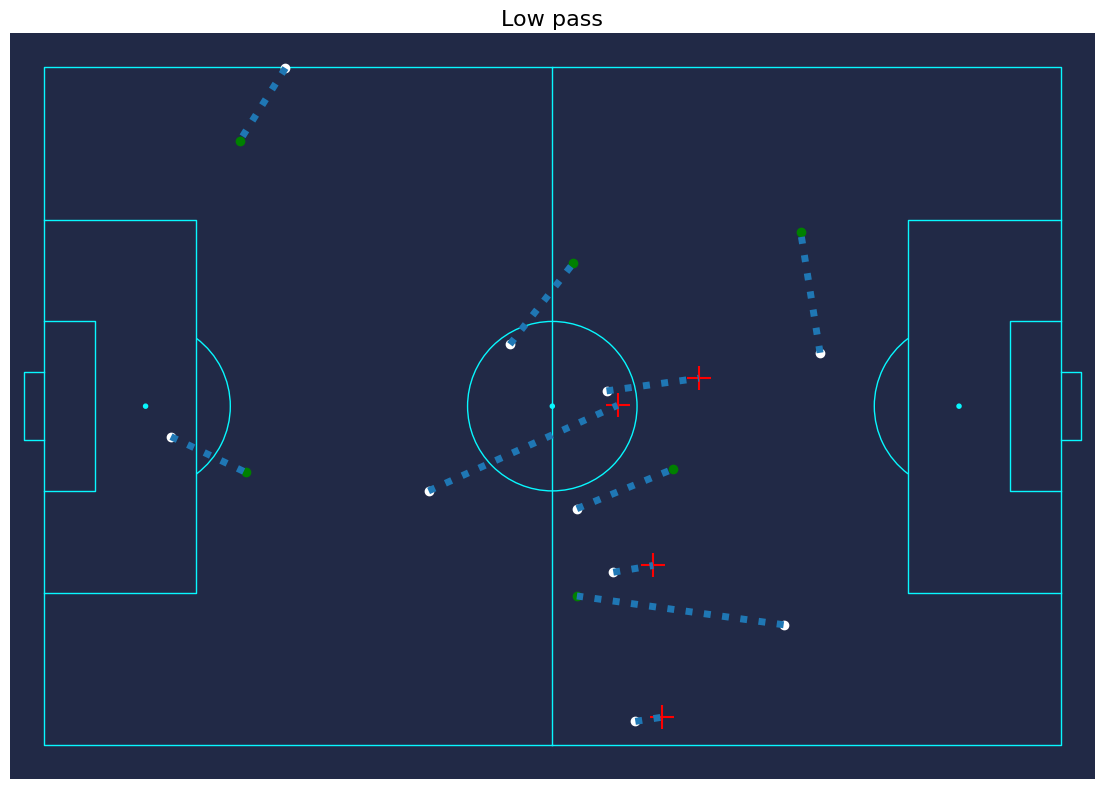

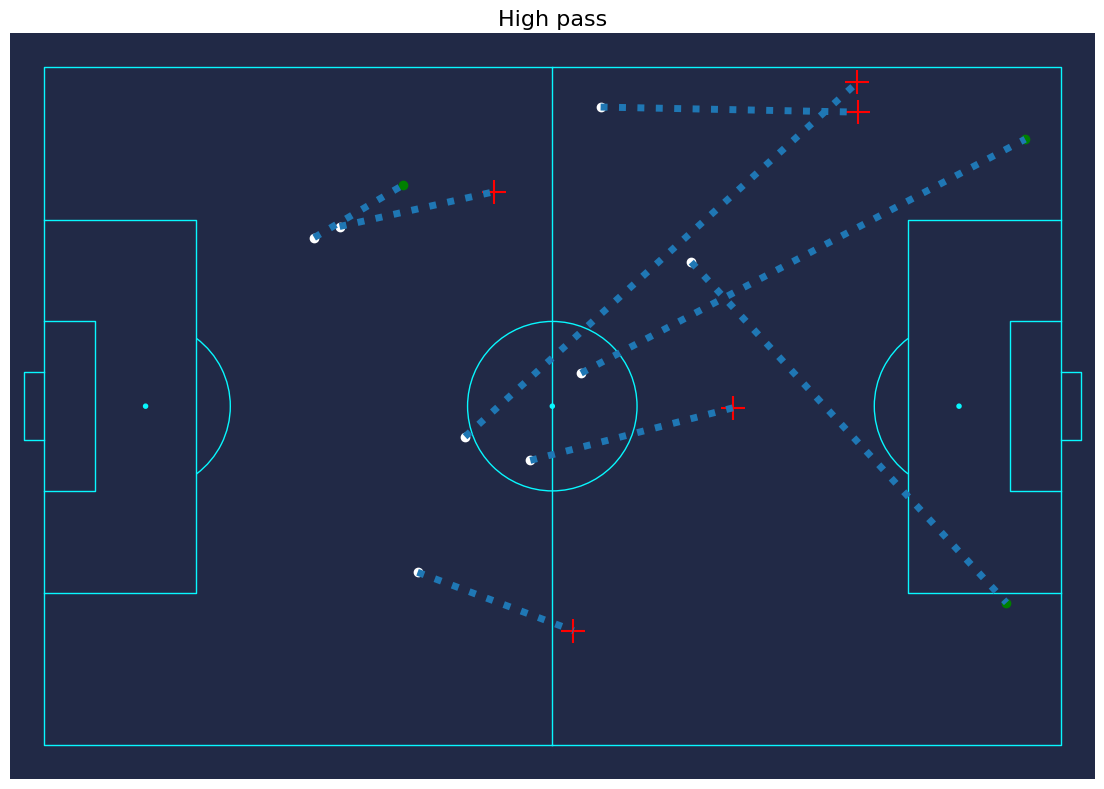

In [8]:
## filtering the dataframe according to the passes which are of three types

df_ground_pass = Tchouaméni_pass[Tchouaméni_pass['pass_height']=="Ground Pass"]
df_low_pass = Tchouaméni_pass[Tchouaméni_pass['pass_height']=="Low Pass"]
df_high_pass = Tchouaméni_pass[Tchouaméni_pass['pass_height']=="High Pass"]

LINEWIDTH = 1  # starting linewidth
DIFF_LINEWIDTH = 1.2  # amount the glow linewidth increases each loop
NUM_GLOW_LINES = 10  # the amount of loops, if you increase the glow will be wider

# in each loop, for the glow, we plot the alpha divided by the num_glow_lines
# I have a lower alpha_pass_line value as there is a slight overlap in
# the pass comet lines when using capstyle='round'
ALPHA_PITCH_LINE = 0.3
ALPHA_PASS_LINE = 0.15

# The colors are borrowed from mplcyberpunk. Try some of the following alternatives
# '#08F7FE' (teal/cyan), '#FE53BB' (pink), '#F5D300' (yellow),
# '#00ff41' (matrix green), 'r' (red), '#9467bd' (viloet)
BACKGROUND_COLOR = '#212946'
PASS_COLOR = '#FE53BB'
LINE_COLOR = '#08F7FE'
p = Pitch(line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR, linewidth=LINEWIDTH,
              line_alpha=1, goal_alpha=1, goal_type='box')

## plot for ground pass
fig, ax = p.draw(figsize=(12, 8))
ax.set_title("Ground pass", fontsize=16)
for index, row in df_ground_pass.iterrows():
    if row['pass_outcome'] in ['Incomplete', 'Out']:       
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'],s=300, color='red',ax=ax,marker='+')
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 
    else:
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'], color='green',ax=ax)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted')

fig, ax = p.draw(figsize=(12, 8))
ax.set_title("Low pass", fontsize=16)
for index, row in df_low_pass.iterrows():
    if row['pass_outcome'] in ['Incomplete', 'Out']:       
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'],s=300, color='red',ax=ax,marker='+')
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 
    else:
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'], color='green',ax=ax)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 

fig, ax = p.draw(figsize=(12, 8))
ax.set_title("High pass", fontsize=16)
for index, row in df_high_pass.iterrows():
    if row['pass_outcome'] in ['Incomplete', 'Out']:      
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'],s=300, color='red',ax=ax,marker='+')
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 
    else:
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'], color='green',ax=ax)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 

### Creating a pass HeatMap

In [9]:
## setting the x and y start and end points for the passes
df_pass[['x_start','y_start']] = pd.DataFrame(df_pass.location.tolist(),index=df_pass.index)
df_pass[['x_end','y_end']] = pd.DataFrame(df_pass.pass_end_location.tolist(),index=df_pass.index)
## calculating the distances
df_pass['distance'] = np.sqrt((df_pass['x_end'] - df_pass['x_start'])**2 + (df_pass['y_end'] - df_pass['y_start'])**2)
df_pass.head()

type      location pass_end_location pass_outcome  \
12  Pass  [61.0, 40.1]      [48.0, 43.2]          NaN   
13  Pass  [49.7, 43.6]       [96.0, 1.8]          Out   
28  Pass   [68.5, 5.7]      [72.1, 13.4]          NaN   
29  Pass  [72.3, 13.4]       [73.6, 4.7]          NaN   
30  Pass   [73.2, 4.0]       [47.1, 7.4]      Unknown   

                     pass_recipient pass_type   play_pattern  \
12        Aurélien Djani Tchouaméni  Kick Off  From Kick Off   
13                   Olivier Giroud       NaN  From Kick Off   
28                    Adrien Rabiot       NaN   Regular Play   
29  Theo Bernard François Hernández       NaN   Regular Play   
30                              NaN       NaN   Regular Play   

                             player under_pressure  x_start  y_start  x_end  \
12                Antoine Griezmann            NaN     61.0     40.1   48.0   
13        Aurélien Djani Tchouaméni            NaN     49.7     43.6   96.0   
28  Theo Bernard François Hernández            NaN     68.5      5.7   72.1   
29                    Adrien Rabiot            NaN     72.3     13.4   73.6   
30  Theo Bernard François Hernández           True     73.2      4.0   47.1   

    y_end   distance  
12   43.2  13.364505  
13    1.8  62.377320  
28   13.4   8.500000  
29    4.7   8.796590  
30    7.4  26.320524

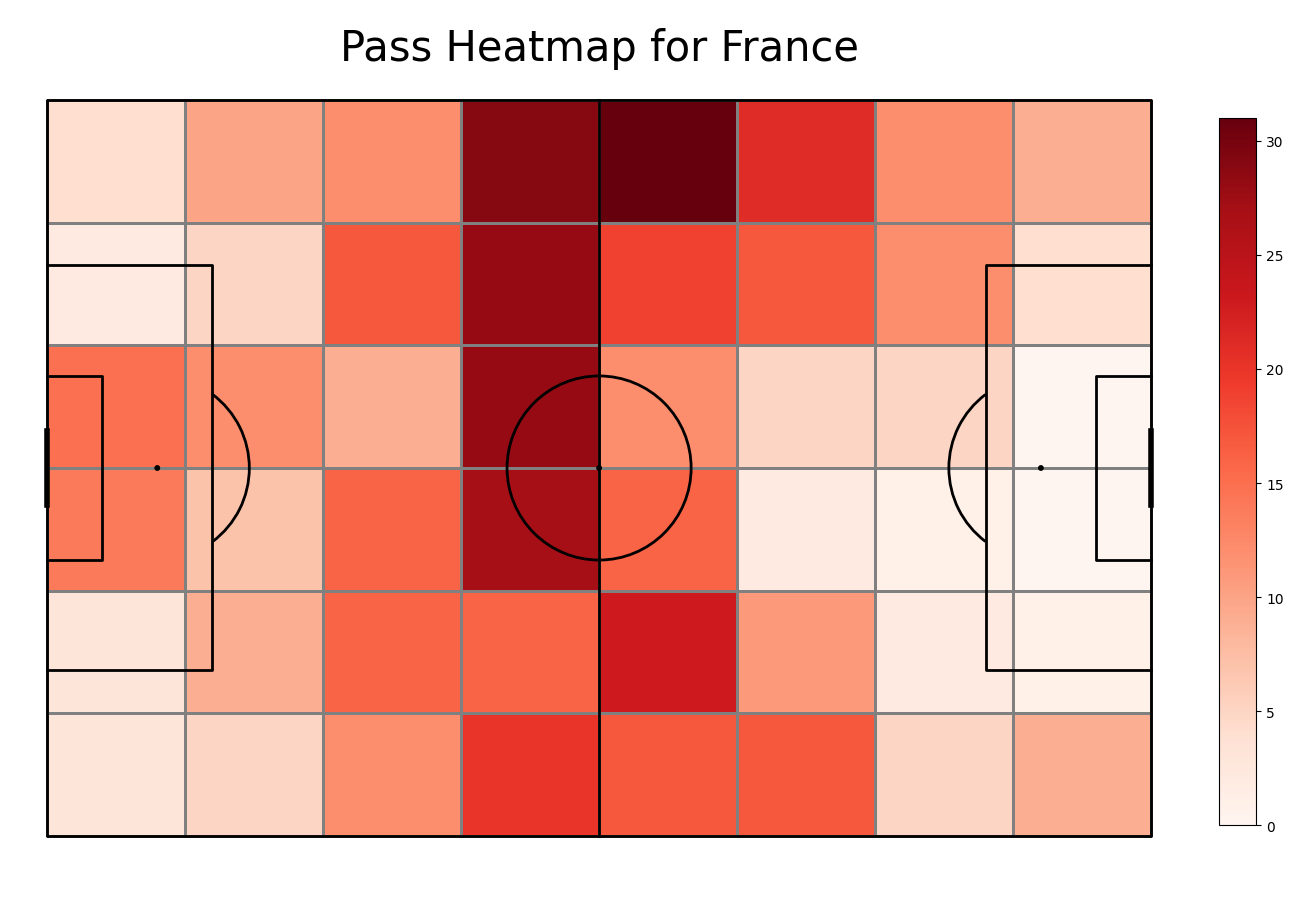

In [10]:
# plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# get the 2D histogram
bin_statistic = pitch.bin_statistic(df_pass.x_start, df_pass.y_start, statistic='count', bins=(8, 6), normalize=False)
pcm = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax['pitch'])

# add legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)

fig.suptitle("Pass Heatmap for France", fontsize=30)
plt.show()

### Creating a passing graph

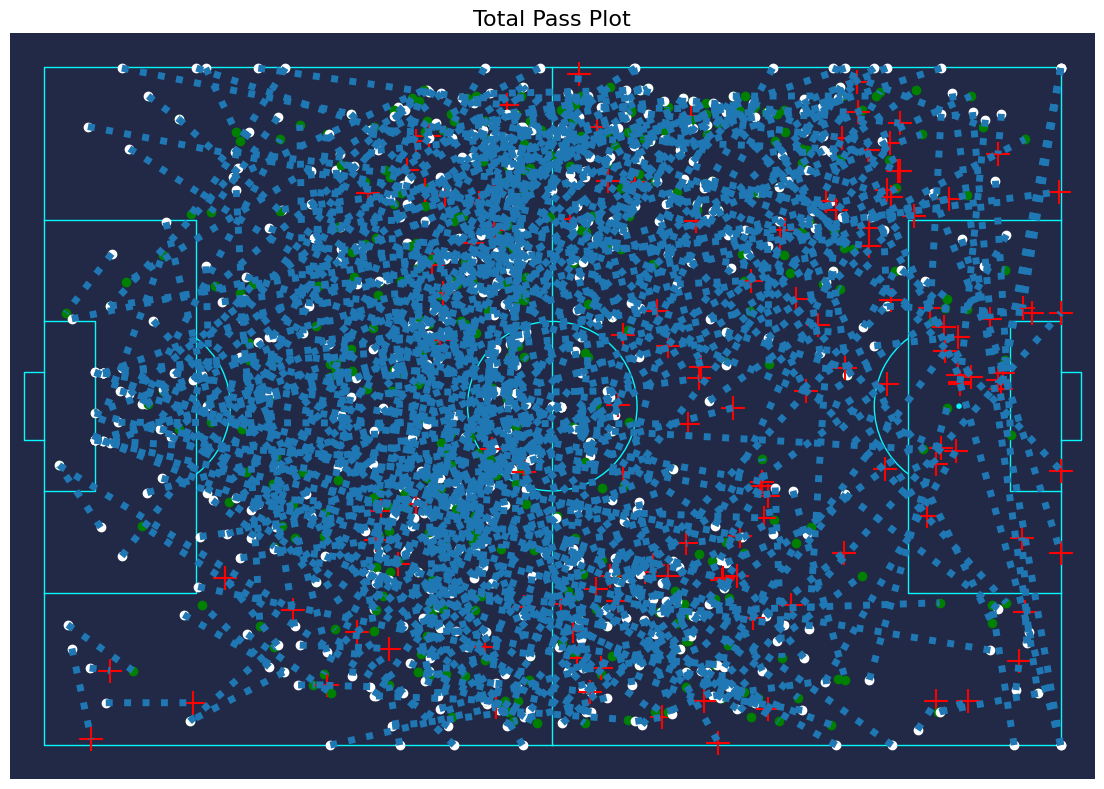

In [11]:
fig, ax = p.draw(figsize=(12, 8))
ax.set_title("Total Pass Plot", fontsize=16)
for index, row in df_pass.iterrows():
    if row['pass_outcome'] in ['Incomplete', 'Out']:       
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'],s=300, color='red',ax=ax,marker='+')
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 
    else:
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'], color='green',ax=ax)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted')

### Creating a passing Network

In [12]:
pass_recipient_data = df_pass[['player', 'pass_recipient', 'x_start', 'y_start', 'x_end', 'y_end']].reset_index().drop('index', axis=1)
pass_recipient_data['player'] = pass_recipient_data['player'].apply(lambda x: x.split(" ")[1])
pass_recipient_data['pass_recipient'] = pass_recipient_data['pass_recipient'].apply(lambda x: x.split(" ")[1] if not pd.isna(x) else x)
pass_recipient_data.head()

player pass_recipient  x_start  y_start  x_end  y_end
0  Griezmann          Djani     61.0     40.1   48.0   43.2
1      Djani         Giroud     49.7     43.6   96.0    1.8
2    Bernard         Rabiot     68.5      5.7   72.1   13.4
3     Rabiot        Bernard     72.3     13.4   73.6    4.7
4    Bernard            NaN     73.2      4.0   47.1    7.4

### Calculating edges width

In [13]:
lines_df = pass_recipient_data.groupby(['player','pass_recipient']).x_start.count().reset_index()
lines_df.rename({'x_start':'pass_count'},axis='columns',inplace=True)
lines_df = lines_df[lines_df['pass_count']>0]

lines_df.head()

player pass_recipient  pass_count
0  Bernard          Djani           5
1  Bernard         Giroud           1
2  Bernard      Griezmann           4
3  Bernard         Koundé           1
4  Bernard         Lloris           1

### Calculating the vertices size and location

In [14]:
scatter_df = pd.DataFrame()
for i, name in enumerate(pass_recipient_data["player"].unique()):
    passx = pass_recipient_data.loc[pass_recipient_data["player"] == name]["x_start"].to_numpy()
    recx = pass_recipient_data.loc[pass_recipient_data["pass_recipient"] == name]["x_end"].to_numpy()
    passy = pass_recipient_data.loc[pass_recipient_data["player"] == name]["y_start"].to_numpy()
    recy = pass_recipient_data.loc[pass_recipient_data["pass_recipient"] == name]["y_end"].to_numpy()
    scatter_df.at[i, "player"] = name
    # make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    # calculate number of passes
    scatter_df.at[i, "no"] = pass_recipient_data.loc[pass_recipient_data["player"] == name].shape[0]
# adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

In [15]:
## the marker size gets larger as the proportion of the passes involved becomes higher
scatter_df.head()

player          x          y    no  marker_size
0  Griezmann  71.233929  40.742857  30.0   652.173913
1      Djani  58.902632  39.069298  69.0  1500.000000
2    Bernard  64.962069   6.756322  49.0  1065.217391
3     Rabiot  65.101042  27.008333  51.0  1108.695652
4     Varane  44.976991  50.130088  61.0  1326.086957

In [16]:
lines_df.head()

player pass_recipient  pass_count
0  Bernard          Djani           5
1  Bernard         Giroud           1
2  Bernard      Griezmann           4
3  Bernard         Koundé           1
4  Bernard         Lloris           1

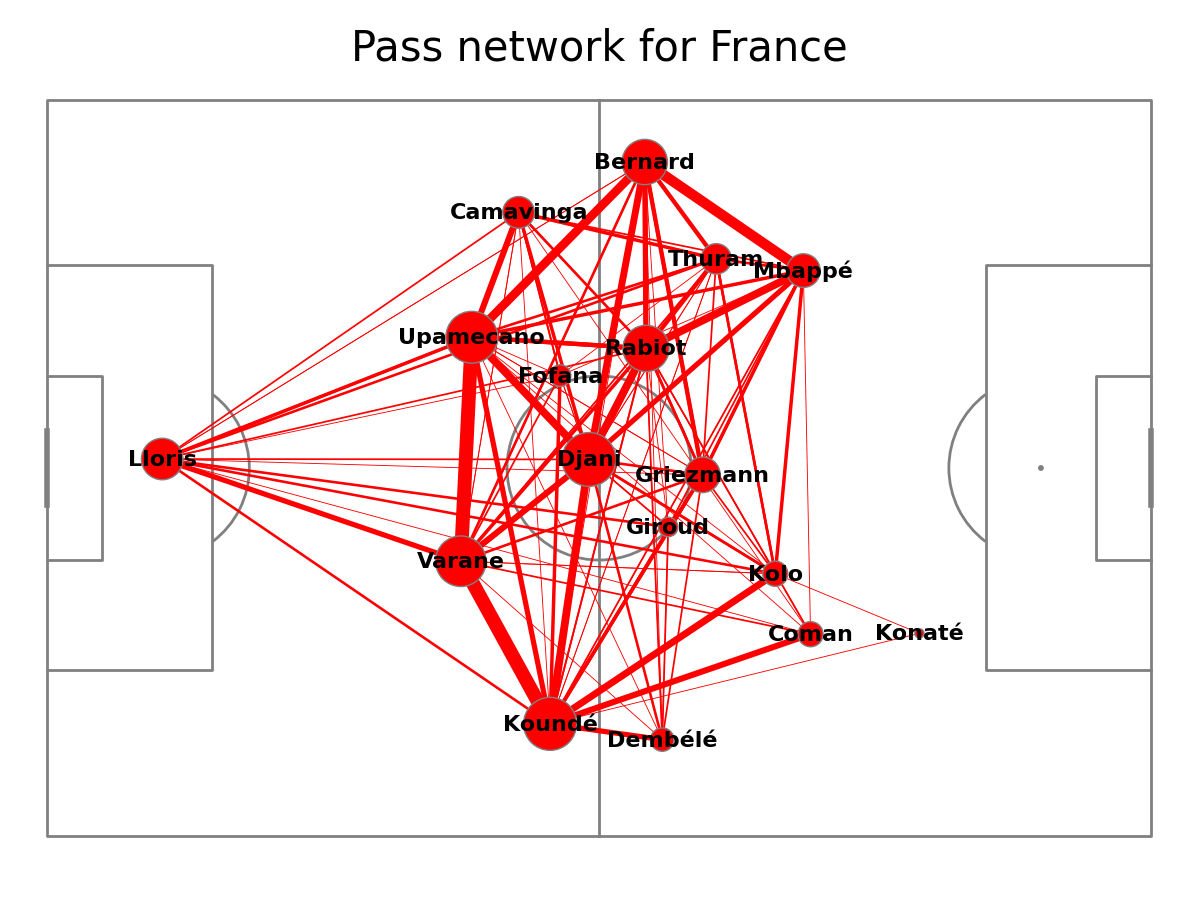

In [17]:
#Drawing pitch
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
    player1 = row['player']
    player2 = row['pass_recipient']
    #take the average location of players to plot a line between them
    player1_x = scatter_df.loc[scatter_df["player"] == player1]['x'].iloc[0]
    player1_y = scatter_df.loc[scatter_df["player"] == player1]['y'].iloc[0]
    player2_x = scatter_df.loc[scatter_df["player"] == player2]['x'].iloc[0]
    player2_y = scatter_df.loc[scatter_df["player"] == player2]['y'].iloc[0]
    num_passes = row["pass_count"]
    #adjust the line width so that the more passes, the wider the line
    line_width = (num_passes / lines_df['pass_count'].max() * 10)
    #plot lines on the pitch
    pitch.lines(player1_x, player1_y, player2_x, player2_y,
                    alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])

fig.suptitle("Pass network for France", fontsize = 30)
plt.show()

### Centralization in terms of passes made

In [18]:
#calculate number of successful passes by player
no_passes = pass_recipient_data.groupby(['player']).x_start.count().reset_index()
no_passes.rename({'x_start':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max()
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum()
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", centralisation_index)
no_passes

Centralisation index is  0.10578947368421053


player  pass_count
0     Bernard          49
1   Camavinga          24
2       Coman          15
3     Dembélé          13
4       Djani          69
5      Fofana          11
6      Giroud           9
7   Griezmann          30
8        Kolo          15
9      Konaté           2
10     Koundé          67
11     Lloris          41
12     Mbappé          27
13     Rabiot          51
14     Thuram          22
15  Upamecano          64
16     Varane          61

### Centralization in terms of passes provided to the player

In [19]:
#calculate number of successful passes by player
no_passes = pass_recipient_data.groupby(['pass_recipient']).x_start.count().reset_index()
no_passes.rename({'x_start':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max()
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum()
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", centralisation_index)
no_passes

Centralisation index is  0.09468302658486707


pass_recipient  pass_count
0         Bernard          38
1       Camavinga          15
2           Coman          11
3         Dembélé          13
4           Djani          45
5          Fofana           7
6          Giroud          10
7       Griezmann          26
8            Kolo          28
9          Konaté           1
10         Koundé          51
11         Lloris          15
12         Mbappé          47
13         Rabiot          45
14         Thuram          29
15      Upamecano          56
16         Varane          52

### Similarly caclulating all the values for argentina

In [20]:
## filtering the dataset for Argentina only
df_france_stats = df[df['team']=='Argentina']
## filtering the dataset above

## total passes under 45 mins
total_pass_under_45 = df_france_stats[(df_france_stats['type']=='Pass') & (df_france_stats['minute']<=45)].shape[0]

## total passes over 45 mmins
total_pass_over_45 = df_france_stats[(df['type']=='Pass') & (df['minute']>45)].shape[0]

## total failed passes under 45 mins
tota_failed_under_45 = df_france_stats[
    (df_france_stats['type'] == 'Pass') & 
    (df_france_stats['minute'] <= 45) & 
    (df_france_stats['pass_outcome'].isin(['Out', 'Incomplete']))
].shape[0]

## total failed passes over 45 mins
tota_failed_over_45 = df_france_stats[
    (df_france_stats['type'] == 'Pass') & 
    (df_france_stats['minute'] > 45) & 
    (df_france_stats['pass_outcome'].isin(['Out', 'Incomplete']))
].shape[0]

# Creating a dictionary
data = {'Category': ['Under 45 Mins', 'Over 45 Mins'],
        'Total': [total_pass_under_45, total_pass_over_45],
        'Failed': [tota_failed_under_45, tota_failed_over_45]}

# Create DataFrame
passes_data = pd.DataFrame(data)

# Melt the DataFrame to long format for Plotly Express
passes_data_long = passes_data.melt(id_vars='Category', var_name='Status', value_name='Count')

fig = px.bar(passes_data_long, x='Category', y='Count', color='Status', barmode='group',
             labels={'Category': 'Pass Categories', 'Count': 'Count'},
             title='Passes for Argentina')
fig.show()

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [21]:
df_pass = df_france_stats[['type','location','pass_end_location',
                           'pass_outcome','pass_recipient','pass_type',
                           'play_pattern','player','under_pressure']]
df_pass = df_pass[df_pass['type'] == 'Pass']
pass_played = df_pass.groupby('player').size().reset_index(name='PassPlayed').sort_values(by='PassPlayed',ascending=False)
pass_recieved = df_pass.groupby('pass_recipient').size().reset_index(name='PassRecieved').sort_values(by='PassRecieved',ascending=False)
print("Total passes played by a player")
print(pass_played)
print('------------------------------------------------------------------------')
print("Total passes recieved by a player")
print(pass_recieved)

Total passes played by a player
                             player  PassPlayed
3                    Enzo Fernandez          94
13          Nicolás Hernán Otamendi          75
1           Cristian Gabriel Romero          71
15           Rodrigo Javier De Paul          68
9    Lionel Andrés Messi Cuccittini          60
11             Nahuel Molina Lucero          56
12     Nicolás Alejandro Tagliafico          56
0               Alexis Mac Allister          52
2          Damián Emiliano Martínez          33
6                    Julián Álvarez          32
16  Ángel Fabián Di María Hernández          29
10              Marcos Javier Acuña          28
8            Leandro Daniel Paredes          15
5             Gonzalo Ariel Montiel          13
7           Lautaro Javier Martínez           7
14      Paulo Bruno Exequiel Dybala           3
4         Germán Alejandro Pezzella           1
------------------------------------------------------------------------
Total passes recieved by a play

### Passes played by Aurélien Enzo Fernandez
As Enzo Fernandez is the highest passer

In [22]:
unique_players = df[['player_id', 'player']].drop_duplicates()
unique_players

player_id                           player
0           NaN                              NaN
12       5487.0                Antoine Griezmann
13      10481.0        Aurélien Djani Tchouaméni
14      29201.0             Nahuel Molina Lucero
15       7797.0           Rodrigo Javier De Paul
16      20572.0          Cristian Gabriel Romero
17       3090.0          Nicolás Hernán Otamendi
20       5507.0     Nicolás Alejandro Tagliafico
27       6909.0         Damián Emiliano Martínez
28       6704.0  Theo Bernard François Hernández
29       3026.0                    Adrien Rabiot
32       5485.0                   Raphaël Varane
33       4445.0                     Jules Koundé
35      27886.0              Alexis Mac Allister
36       5503.0   Lionel Andrés Messi Cuccittini
37       2995.0  Ángel Fabián Di María Hernández
41       3099.0                      Hugo Lloris
42       3604.0                   Olivier Giroud
48      38718.0                   Enzo Fernandez
59       3009.0             Kylian Mbappé Lottin
65       5477.0                  Ousmane Dembélé
68      29560.0                   Julián Álvarez
72       8519.0         Dayotchanculle Upamecano
463     22097.0                Randal Kolo Muani
489      2972.0                    Marcus Thuram
718     19597.0              Marcos Javier Acuña
810     24778.0                Eduardo Camavinga
824      8217.0                   Kingsley Coman
1039    28263.0            Gonzalo Ariel Montiel
1079    11990.0                  Youssouf Fofana
1136    16308.0           Leandro Daniel Paredes
1148    11456.0          Lautaro Javier Martínez
1227    11135.0                  Ibrahima Konaté
1247     5743.0      Paulo Bruno Exequiel Dybala
1250     7161.0        Germán Alejandro Pezzella

In [23]:
ID=38718.0
## filtering the pass datapoints for Tchouaméni
Tchouaméni_pass = df[(df['player_id']==ID) & (df['type']=='Pass')].reset_index(drop=True)

## setting the x and y start and end points for the passes
Tchouaméni_pass[['x_start','y_start']] = pd.DataFrame(Tchouaméni_pass.location.tolist(),index=Tchouaméni_pass.index)
Tchouaméni_pass[['x_end','y_end']] = pd.DataFrame(Tchouaméni_pass.pass_end_location.tolist(),index=Tchouaméni_pass.index)
## calculating the distances
Tchouaméni_pass['distance'] = np.sqrt((Tchouaméni_pass['x_end'] - Tchouaméni_pass['x_start'])**2 + (Tchouaméni_pass['y_end'] - Tchouaméni_pass['y_start'])**2)
Tchouaméni_pass.head()

50_50 bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
0   NaN                NaN                  NaN                     NaN   
1   NaN                NaN                  NaN                     NaN   
2   NaN                NaN                  NaN                     NaN   
3   NaN                NaN                  NaN                     NaN   
4   NaN                NaN                  NaN                     NaN   

  ball_recovery_recovery_failure block_deflection block_offensive  \
0                            NaN              NaN             NaN   
1                            NaN              NaN             NaN   
2                            NaN              NaN             NaN   
3                            NaN              NaN             NaN   
4                            NaN              NaN             NaN   

  carry_end_location clearance_aerial_won clearance_body_part  ...  type  \
0                NaN                  NaN                 NaN  ...  Pass   
1                NaN                  NaN                 NaN  ...  Pass   
2                NaN                  NaN                 NaN  ...  Pass   
3                NaN                  NaN                 NaN  ...  Pass   
4                NaN                  NaN                 NaN  ...  Pass   

  under_pressure                            event_uuid  \
0            NaN  ccf62199-06ff-4f47-aa5b-dd9ef4ad9e83   
1            NaN  2c1ee73b-c0b0-462e-b5fa-850dd57bca94   
2            NaN  758c87df-1793-48d7-8c4d-6810bb23efd0   
3            NaN  0779dd4d-13cf-4fe1-a23a-a5998e5b3fe8   
4            NaN  58b8cbb6-0f0c-43a2-b39d-4f77a77356b9   

                                        visible_area  \
0  [51.522483913418, 75.1288790064454, 39.9541671...   
1  [45.5147879073055, 70.6452585482825, 25.604828...   
2  [31.4126713497741, 80.0, 0.0, 19.8396542997634...   
3  [97.0872805164182, 70.2420525075483, 70.881940...   
4  [33.4313586099023, 80.0, 0.0, 20.3201643452449...   

                                        freeze_frame x_start y_start  x_end  \
0  [{'teammate': True, 'actor': False, 'keeper': ...    54.8    37.8   56.5   
1  [{'teammate': True, 'actor': False, 'keeper': ...    56.5    39.7   66.4   
2  [{'teammate': True, 'actor': False, 'keeper': ...    34.3    50.2   38.8   
3  [{'teammate': False, 'actor': False, 'keeper':...    88.0    23.9   93.7   
4  [{'teammate': True, 'actor': False, 'keeper': ...    33.9    51.1  112.1   

  y_end   distance  
0  60.5  22.763567  
1  42.9  10.404326  
2  53.4   5.521775  
3  20.3   6.741662  
4  58.1  78.512674  

[5 rows x 102 columns]

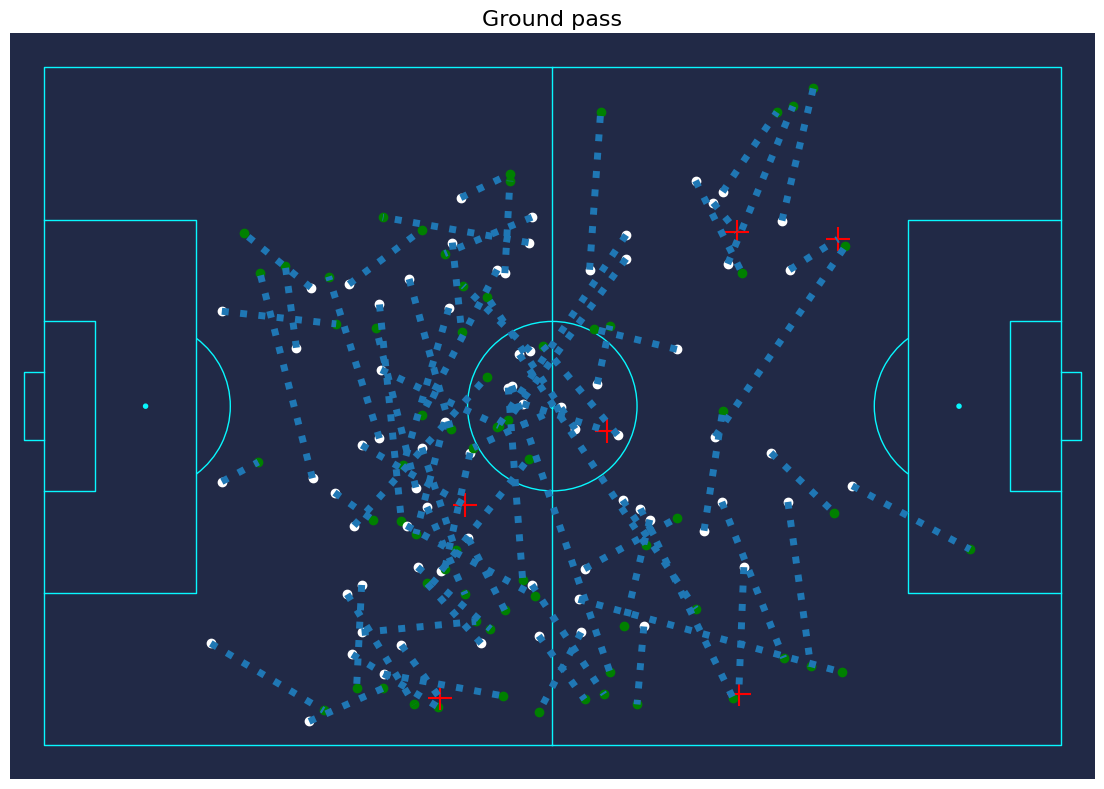

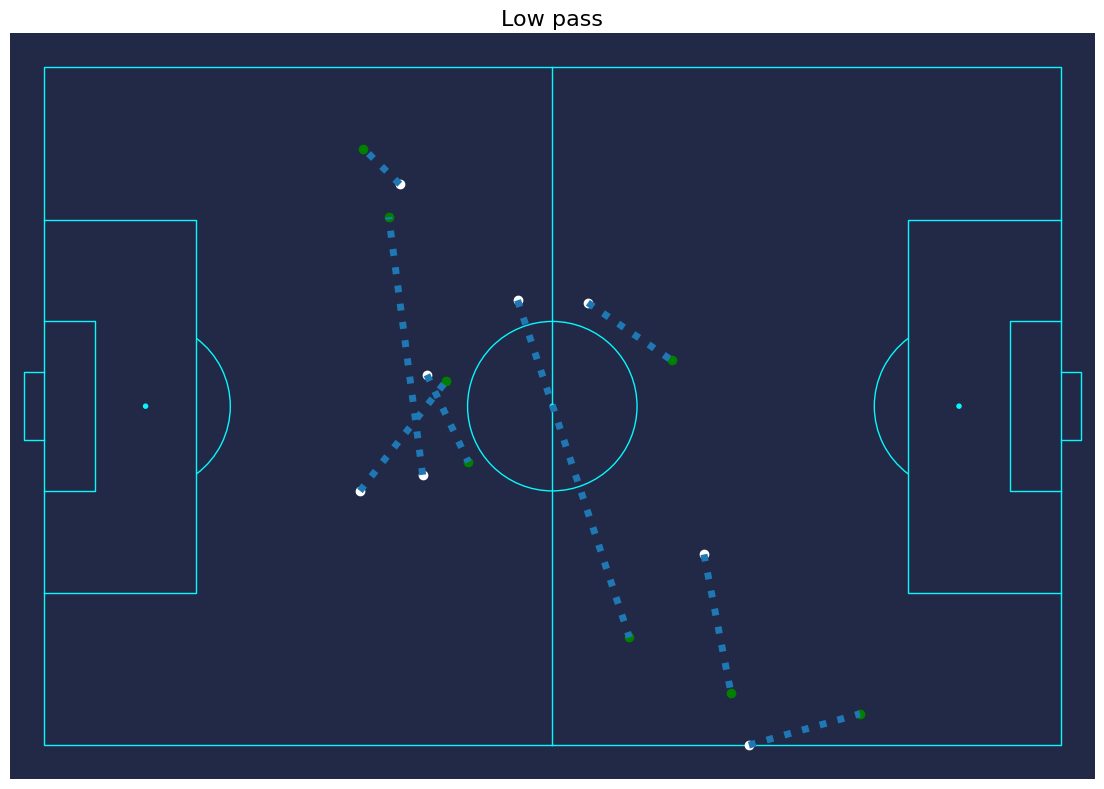

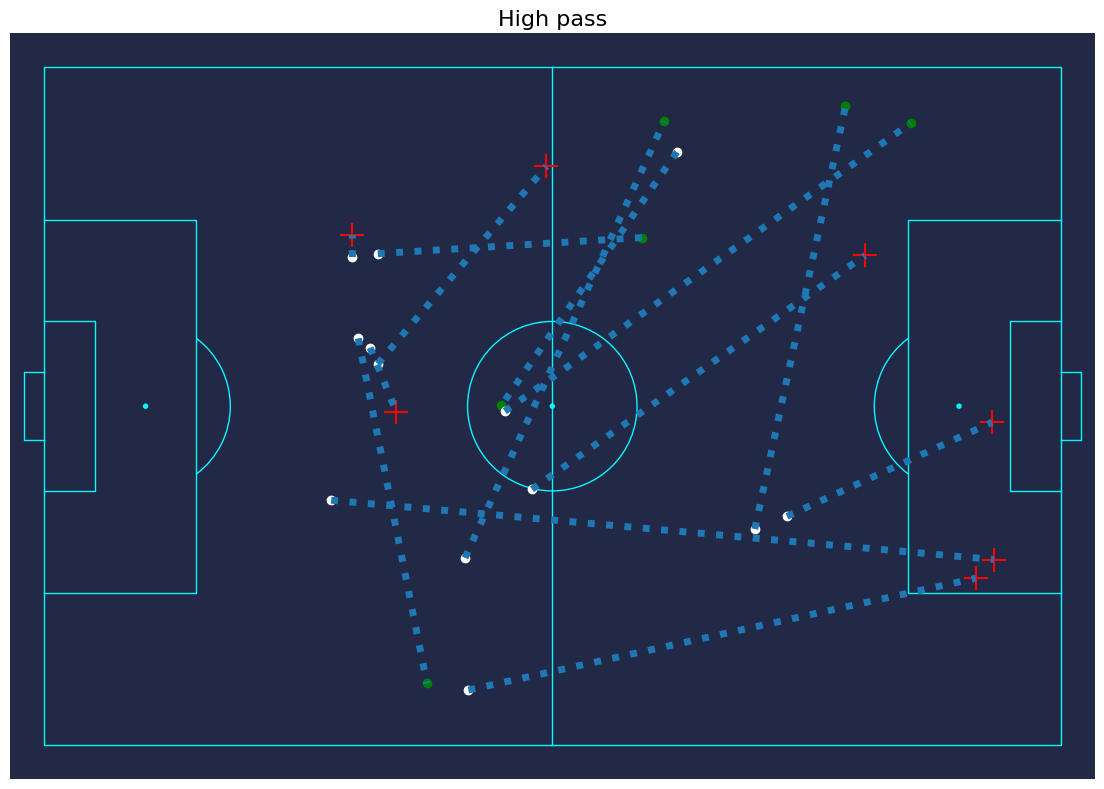

In [24]:
## filtering the dataframe according to the passes which are of three types

df_ground_pass = Tchouaméni_pass[Tchouaméni_pass['pass_height']=="Ground Pass"]
df_low_pass = Tchouaméni_pass[Tchouaméni_pass['pass_height']=="Low Pass"]
df_high_pass = Tchouaméni_pass[Tchouaméni_pass['pass_height']=="High Pass"]

LINEWIDTH = 1  # starting linewidth
DIFF_LINEWIDTH = 1.2  # amount the glow linewidth increases each loop
NUM_GLOW_LINES = 10  # the amount of loops, if you increase the glow will be wider

# in each loop, for the glow, we plot the alpha divided by the num_glow_lines
# I have a lower alpha_pass_line value as there is a slight overlap in
# the pass comet lines when using capstyle='round'
ALPHA_PITCH_LINE = 0.3
ALPHA_PASS_LINE = 0.15

# The colors are borrowed from mplcyberpunk. Try some of the following alternatives
# '#08F7FE' (teal/cyan), '#FE53BB' (pink), '#F5D300' (yellow),
# '#00ff41' (matrix green), 'r' (red), '#9467bd' (viloet)
BACKGROUND_COLOR = '#212946'
PASS_COLOR = '#FE53BB'
LINE_COLOR = '#08F7FE'
p = Pitch(line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR, linewidth=LINEWIDTH,
              line_alpha=1, goal_alpha=1, goal_type='box')

## plot for ground pass
fig, ax = p.draw(figsize=(12, 8))
ax.set_title("Ground pass", fontsize=16)
for index, row in df_ground_pass.iterrows():
    if row['pass_outcome'] in ['Incomplete', 'Out']:       
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'],s=300, color='red',ax=ax,marker='+')
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 
    else:
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'], color='green',ax=ax)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted')

fig, ax = p.draw(figsize=(12, 8))
ax.set_title("Low pass", fontsize=16)
for index, row in df_low_pass.iterrows():
    if row['pass_outcome'] in ['Incomplete', 'Out']:       
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'],s=300, color='red',ax=ax,marker='+')
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 
    else:
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'], color='green',ax=ax)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 

fig, ax = p.draw(figsize=(12, 8))
ax.set_title("High pass", fontsize=16)
for index, row in df_high_pass.iterrows():
    if row['pass_outcome'] in ['Incomplete', 'Out']:      
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'],s=300, color='red',ax=ax,marker='+')
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 
    else:
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'], color='green',ax=ax)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 

### Creating a pass HeatMap

In [25]:
## setting the x and y start and end points for the passes
df_pass[['x_start','y_start']] = pd.DataFrame(df_pass.location.tolist(),index=df_pass.index)
df_pass[['x_end','y_end']] = pd.DataFrame(df_pass.pass_end_location.tolist(),index=df_pass.index)
## calculating the distances
df_pass['distance'] = np.sqrt((df_pass['x_end'] - df_pass['x_start'])**2 + (df_pass['y_end'] - df_pass['y_start'])**2)
df_pass.head()

type      location pass_end_location pass_outcome  \
14  Pass  [22.7, 80.0]      [36.0, 75.2]          NaN   
15  Pass  [41.1, 73.9]      [23.2, 62.8]          NaN   
16  Pass  [24.7, 59.4]      [21.5, 32.2]          NaN   
17  Pass  [24.0, 27.1]      [21.7, 49.3]          NaN   
18  Pass  [22.1, 49.8]      [24.0, 27.3]          NaN   

             pass_recipient  pass_type    play_pattern  \
14   Rodrigo Javier De Paul   Throw-in   From Throw In   
15  Cristian Gabriel Romero  Free Kick  From Free Kick   
16  Nicolás Hernán Otamendi        NaN  From Free Kick   
17  Cristian Gabriel Romero        NaN  From Free Kick   
18  Nicolás Hernán Otamendi        NaN  From Free Kick   

                     player under_pressure  x_start  y_start  x_end  y_end  \
14     Nahuel Molina Lucero            NaN     22.7     80.0   36.0   75.2   
15   Rodrigo Javier De Paul            NaN     41.1     73.9   23.2   62.8   
16  Cristian Gabriel Romero            NaN     24.7     59.4   21.5   32.2   
17  Nicolás Hernán Otamendi            NaN     24.0     27.1   21.7   49.3   
18  Cristian Gabriel Romero            NaN     22.1     49.8   24.0   27.3   

     distance  
14  14.139661  
15  21.062289  
16  27.387588  
17  22.318826  
18  22.580080

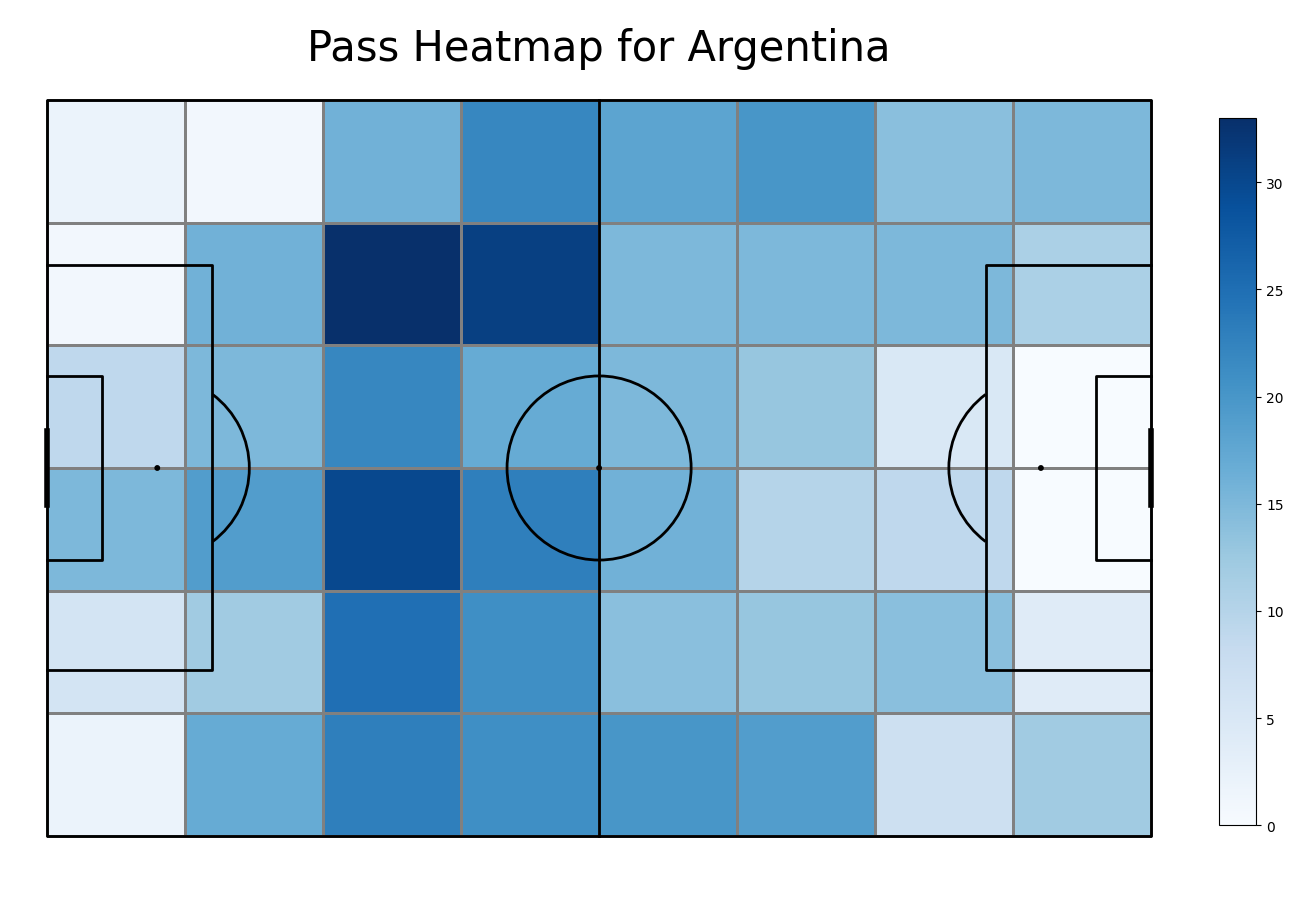

In [26]:
# plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# get the 2D histogram
bin_statistic = pitch.bin_statistic(df_pass.x_start, df_pass.y_start, statistic='count', bins=(8, 6), normalize=False)
pcm = pitch.heatmap(bin_statistic, cmap='Blues', edgecolor='grey', ax=ax['pitch'])

# add legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)

fig.suptitle("Pass Heatmap for Argentina", fontsize=30)
plt.show()

### Plotting the passes for Argentina

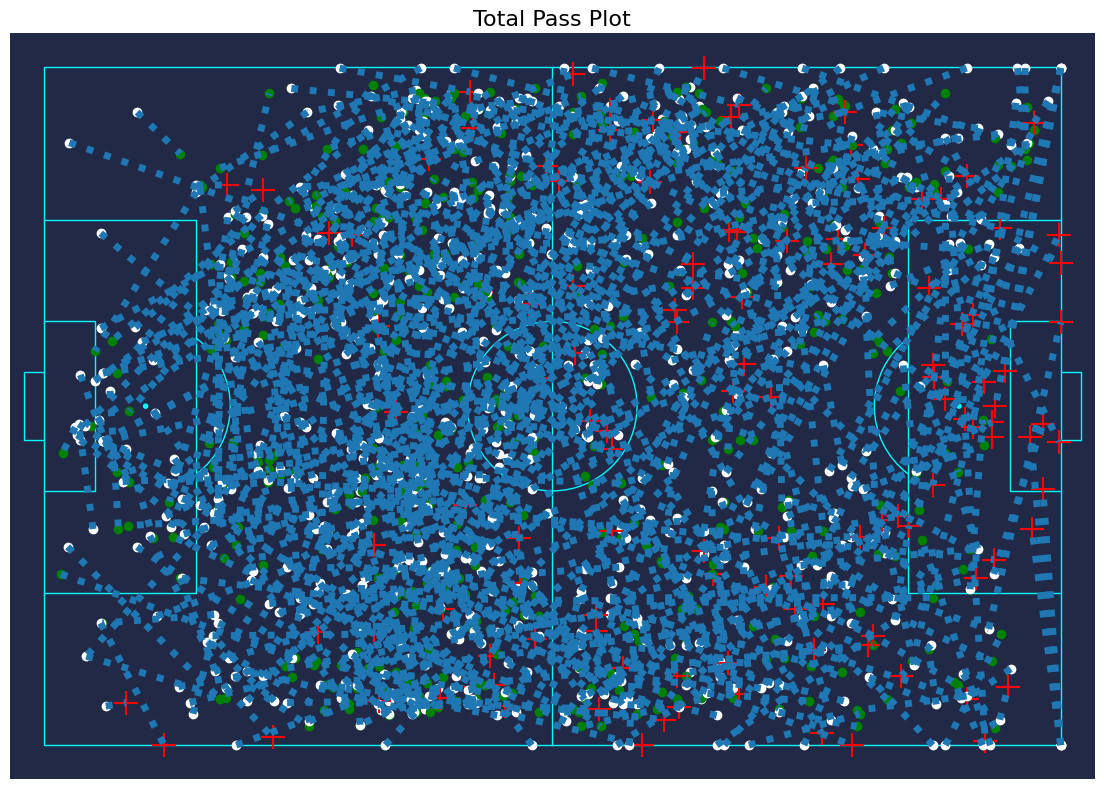

In [27]:
fig, ax = p.draw(figsize=(12, 8))
ax.set_title("Total Pass Plot", fontsize=16)
for index, row in df_pass.iterrows():
    if row['pass_outcome'] in ['Incomplete', 'Out']:       
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'],s=300, color='red',ax=ax,marker='+')
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted') 
    else:
        p.scatter(x=row['x_start'], y=row['y_start'], color='white',ax=ax)
        p.scatter(x=row['x_end'], y=row['y_end'], color='green',ax=ax)
        p.lines(xstart=row['x_start'], xend=row['x_end'], ystart=row['y_start'], yend=row['y_end'], ax=ax,linestyle='dotted')

### Creating a passing network

In [28]:
df_pass.player.drop_duplicates()

14                 Nahuel Molina Lucero
15               Rodrigo Javier De Paul
16              Cristian Gabriel Romero
17              Nicolás Hernán Otamendi
20         Nicolás Alejandro Tagliafico
27             Damián Emiliano Martínez
35                  Alexis Mac Allister
36       Lionel Andrés Messi Cuccittini
37      Ángel Fabián Di María Hernández
48                       Enzo Fernandez
68                       Julián Álvarez
718                 Marcos Javier Acuña
1039              Gonzalo Ariel Montiel
1136             Leandro Daniel Paredes
1148            Lautaro Javier Martínez
1247        Paulo Bruno Exequiel Dybala
1250          Germán Alejandro Pezzella
Name: player, dtype: object

In [29]:
pass_recipient_data = df_pass[['player', 'pass_recipient', 'x_start', 'y_start', 'x_end', 'y_end']].reset_index().drop('index', axis=1)
pass_recipient_data['player'] = pass_recipient_data['player'].apply(lambda x: x.split(" ")[-1])
pass_recipient_data['pass_recipient'] = pass_recipient_data['pass_recipient'].apply(lambda x: x.split(" ")[-1] if not pd.isna(x) else x)
pass_recipient_data.head()

player pass_recipient  x_start  y_start  x_end  y_end
0    Lucero           Paul     22.7     80.0   36.0   75.2
1      Paul         Romero     41.1     73.9   23.2   62.8
2    Romero       Otamendi     24.7     59.4   21.5   32.2
3  Otamendi         Romero     24.0     27.1   21.7   49.3
4    Romero       Otamendi     22.1     49.8   24.0   27.3

### Calculating edges width

In [30]:
lines_df = pass_recipient_data.groupby(['player','pass_recipient']).x_start.count().reset_index()
lines_df.rename({'x_start':'pass_count'},axis='columns',inplace=True)
lines_df = lines_df[lines_df['pass_count']>0]

lines_df.head()

player pass_recipient  pass_count
0  Acuña       Allister           5
1  Acuña     Cuccittini           1
2  Acuña         Dybala           1
3  Acuña      Fernandez           1
4  Acuña       Martínez           5

### Calculating the vertices size and location

In [31]:
scatter_df = pd.DataFrame()
for i, name in enumerate(pass_recipient_data["player"].unique()):
    passx = pass_recipient_data.loc[pass_recipient_data["player"] == name]["x_start"].to_numpy()
    recx = pass_recipient_data.loc[pass_recipient_data["pass_recipient"] == name]["x_end"].to_numpy()
    passy = pass_recipient_data.loc[pass_recipient_data["player"] == name]["y_start"].to_numpy()
    recy = pass_recipient_data.loc[pass_recipient_data["pass_recipient"] == name]["y_end"].to_numpy()
    scatter_df.at[i, "player"] = name
    # make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    # calculate number of passes
    scatter_df.at[i, "no"] = pass_recipient_data.loc[pass_recipient_data["player"] == name].shape[0]
# adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

In [32]:
scatter_df.head()

player          x          y    no  marker_size
0      Lucero  56.527473  71.500000  56.0   893.617021
1        Paul  61.392958  60.028169  68.0  1085.106383
2      Romero  34.200870  52.098261  71.0  1132.978723
3    Otamendi  38.243704  23.340000  75.0  1196.808511
4  Tagliafico  59.653846   9.197802  56.0   893.617021

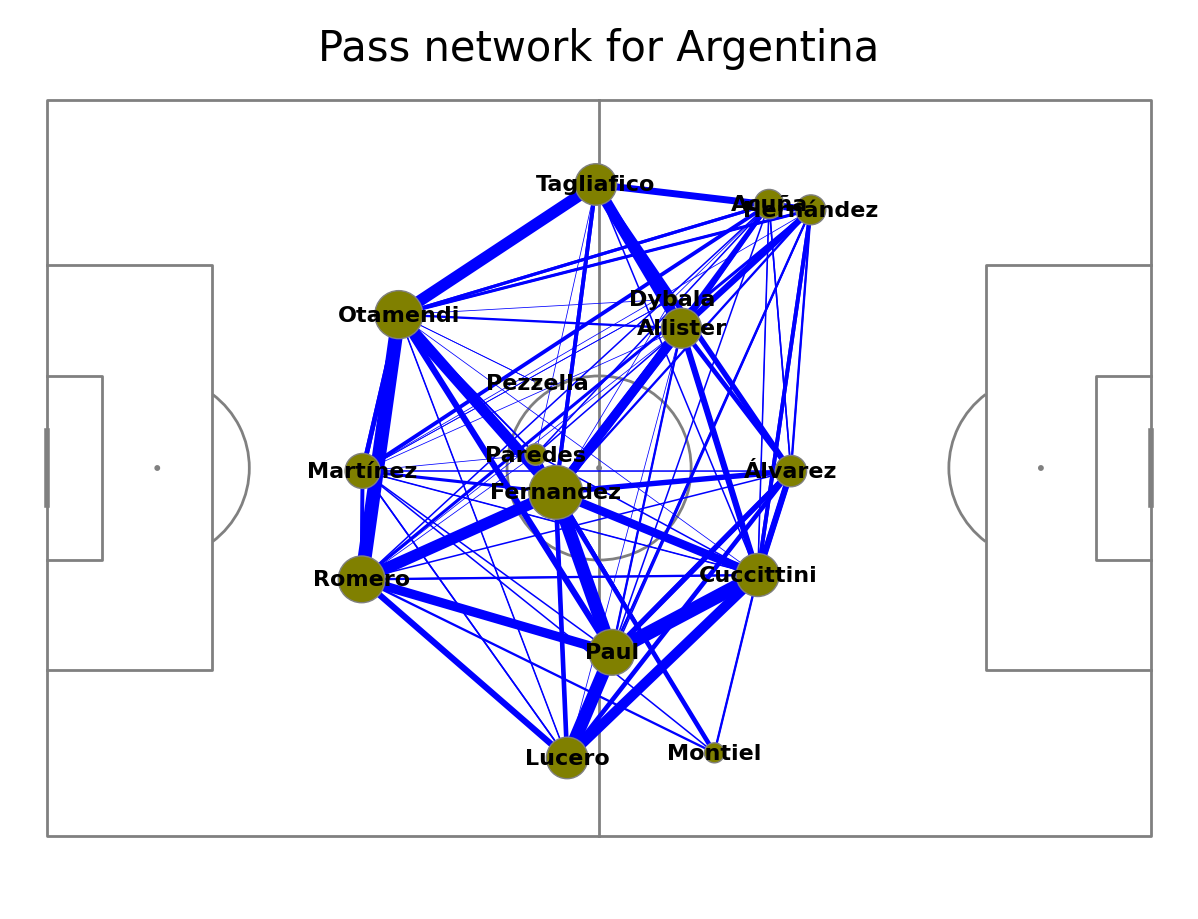

In [33]:
#Drawing pitch
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='olive', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
    player1 = row['player']
    player2 = row['pass_recipient']
    #take the average location of players to plot a line between them
    player1_x = scatter_df.loc[scatter_df["player"] == player1]['x'].iloc[0]
    player1_y = scatter_df.loc[scatter_df["player"] == player1]['y'].iloc[0]
    player2_x = scatter_df.loc[scatter_df["player"] == player2]['x'].iloc[0]
    player2_y = scatter_df.loc[scatter_df["player"] == player2]['y'].iloc[0]
    num_passes = row["pass_count"]
    #adjust the line width so that the more passes, the wider the line
    line_width = (num_passes / lines_df['pass_count'].max() * 10)
    #plot lines on the pitch
    pitch.lines(player1_x, player1_y, player2_x, player2_y,
                    alpha=1, lw=line_width, zorder=2, color="blue", ax = ax["pitch"])

fig.suptitle("Pass network for Argentina", fontsize = 30)
plt.show()

###  Centralization in terms of passes made

In [34]:
#calculate number of successful passes by player
no_passes = pass_recipient_data.groupby(['player']).x_start.count().reset_index()
no_passes.rename({'x_start':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max()
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum()
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", centralisation_index)
no_passes

Centralisation index is  0.11702741702741702


player  pass_count
0        Acuña          28
1     Allister          52
2   Cuccittini          60
3       Dybala           3
4    Fernandez          94
5    Hernández          29
6       Lucero          56
7     Martínez          40
8      Montiel          13
9     Otamendi          75
10     Paredes          15
11        Paul          68
12    Pezzella           1
13      Romero          71
14  Tagliafico          56
15     Álvarez          32

### Centralization in terms of passes provided to the player

In [35]:
#calculate number of successful passes by player
no_passes = pass_recipient_data.groupby(['pass_recipient']).x_start.count().reset_index()
no_passes.rename({'x_start':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max()
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum()
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", centralisation_index)
no_passes

Centralisation index is  0.12016


pass_recipient  pass_count
0           Acuña          32
1        Allister          52
2      Cuccittini          74
3          Dybala           3
4       Fernandez          86
5       Hernández          36
6          Lucero          35
7        Martínez          26
8         Montiel          13
9        Otamendi          60
10        Paredes           9
11           Paul          74
12       Pezzella           1
13         Romero          44
14     Tagliafico          35
15        Álvarez          45